In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold


from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn import naive_bayes
# from sklearn import svm


# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus




In [2]:
df = pd.read_pickle('merged_L1_vecs.pkl')
df.head()

,pair,L1,target
0,"(6f4a3b50.jpg, bfc76005.jpg)","[0.0, 0.0009992420673370361, 0.002755224704742...",1
1,"(c4b0ed02.jpg, ed744e52.jpg)","[0.0, 0.015301823616027832, 0.0184091925621032...",1
2,"(32d9e0da.jpg, e5fe87a4.jpg)","[0.0, 0.0073434412479400635, 0.002316087484359...",1
3,"(63c18173.jpg, ae8aa8b1.jpg)","[0.0, 0.006539702415466309, 0.0031872391700744...",1
4,"(13503533.jpg, 8f1fb719.jpg)","[0.0, 0.008989393711090088, 0.0099983811378479...",1


### Prepare train/test data

In [4]:
X = pd.DataFrame(list(df.L1))
X.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.0,0.000999,0.002755,0.011322,0.012030,0.0,0.013813,0.0,0.0,0.0,...,0.011351,0.002303,0.005471,0.015959,0.013394,0.0,0.0,0.0,0.0,0.003967
1,0.0,0.015302,0.018409,0.013967,0.052472,0.0,0.013169,0.0,0.0,0.0,...,0.004921,0.010240,0.055135,0.002037,0.032642,0.0,0.0,0.0,0.0,0.001627
2,0.0,0.007343,0.002316,0.024200,0.014628,0.0,0.038182,0.0,0.0,0.0,...,0.013529,0.015881,0.022575,0.037361,0.031229,0.0,0.0,0.0,0.0,0.000569
3,0.0,0.006540,0.003187,0.014586,0.044745,0.0,0.041835,0.0,0.0,0.0,...,0.029289,0.008366,0.020637,0.044380,0.056264,0.0,0.0,0.0,0.0,0.000420
4,0.0,0.008989,0.009998,0.002497,0.003741,0.0,0.001339,0.0,0.0,0.0,...,0.000020,0.004197,0.004611,0.007458,0.004316,0.0,0.0,0.0,0.0,0.005085


In [28]:
y = df.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
len(y)

30816

In [31]:
data = X.iloc[:,:]
data[4096]=list(y)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,0.0,0.000999,0.002755,0.011322,0.012030,0.0,0.013813,0.0,0.0,0.0,...,0.002303,0.005471,0.015959,0.013394,0.0,0.0,0.0,0.0,0.003967,1
1,0.0,0.015302,0.018409,0.013967,0.052472,0.0,0.013169,0.0,0.0,0.0,...,0.010240,0.055135,0.002037,0.032642,0.0,0.0,0.0,0.0,0.001627,1
2,0.0,0.007343,0.002316,0.024200,0.014628,0.0,0.038182,0.0,0.0,0.0,...,0.015881,0.022575,0.037361,0.031229,0.0,0.0,0.0,0.0,0.000569,1
3,0.0,0.006540,0.003187,0.014586,0.044745,0.0,0.041835,0.0,0.0,0.0,...,0.008366,0.020637,0.044380,0.056264,0.0,0.0,0.0,0.0,0.000420,1
4,0.0,0.008989,0.009998,0.002497,0.003741,0.0,0.001339,0.0,0.0,0.0,...,0.004197,0.004611,0.007458,0.004316,0.0,0.0,0.0,0.0,0.005085,1


In [32]:
data.to_pickle('data.pkl')

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, stratify=y, test_size=0.3, random_state=432)

In [8]:
def model_scores(clf, xtrain, ytrain, xtest, ytest, threshold=0.5):
    clf.fit(xtrain,ytrain)
    # calculate and print scores for train
    y_true = ytrain
    y_prob = clf.predict_proba(xtrain)[:,1]
    y_pred = np.where(y_prob>threshold, 1, 0)
    train_acc=accuracy_score(y_true, y_pred)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print(classification_report(y_true, y_pred))
    conf = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(conf)
    
    # calculate and print scores for test
    test_acc=clf.score(xtest,ytest)
    y_true = ytest
    y_prob = clf.predict_proba(xtest)[:,1]
    y_pred = np.where(y_prob>threshold, 1, 0)
    test_acc=accuracy_score(y_true, y_pred)
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    print(classification_report(y_true, y_pred))
    conf = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(conf)
    
    make_plots(clf,xtest,ytest,threshold)
    
def make_plots(clf,x,y,threshold=0.5):

    plt.subplots(1,2,figsize=(8,4))
    plt.subplot(1,2,1)
    plot_roc(clf,x,y)
    # plot confusion matrix
    plt.subplot(1,2,2)
    plot_conf(clf,x,y,threshold)
    
def plot_roc(clf,x,y):

    # calculate ROC
    pos_label = 1 # roc-curve for poisonous mushrooms
    y_score=clf.predict_proba(x)[:,pos_label]
    fpr, tpr,_ = roc_curve(y, y_score, pos_label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,tpr,'k',linewidth=3,alpha=0.5)
    pos_label = 0 # roc-curve for edible mushrooms
    y_score=clf.predict_proba(x)[:,pos_label]
    fpr, tpr,_ = roc_curve(y, y_score, pos_label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,tpr,'r',linewidth=3,alpha=0.5)
    
    plt.plot([0,1],[0,1],'k:')
    plt.legend(['same','different'],fontsize=12)
    plt.xlabel('FPR',fontsize=12,fontweight='bold')
    plt.ylabel('TPR',fontsize=12,fontweight='bold')
    plt.axis('scaled')
    plt.tight_layout()

def plot_roc_simple(clf,x,y,pos_label=0):
    
    # calculate ROC
    y_score=clf.predict_proba(x)[:,pos_label]
    fpr, tpr,_ = roc_curve(y, y_score, pos_label)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr,tpr,linewidth=5, alpha=0.5)

    
def plot_conf(clf,x,y,threshold=0.5):
    
    y_true = y
    y_prob = clf.predict_proba(x)[:,1]
    y_pred = np.where(y_prob>threshold, 1, 0)
    conf = confusion_matrix(y_true, y_pred, labels=[1,0])
#     print(conf)
    
    # plot confusion matrix
    plt.imshow(conf, interpolation='nearest',cmap=plt.cm.bone_r)
    plt.text(0,0,conf[0][0],fontsize=21,fontweight='bold',color='w',ha='center')
    plt.text(1,0,conf[0][1],fontsize=21,fontweight='bold',color='#CC0000',ha='center')
    plt.text(0,1,conf[1][0],fontsize=21,fontweight='bold',color='#88CC00',ha='center')
    plt.text(1,1,conf[1][1],fontsize=21,fontweight='bold',color='w',ha='center')
    ax = plt.gca()
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Same\n(Predicted)','Different\n(Predicted)'],fontsize=12)
    ax.set_yticks([0,1])
    ax.set_yticklabels(['Same\n(True)','Different\n(True)'],fontsize=12)
    plt.tight_layout()

### Logistic Regression

Training Data Accuracy: 0.63
             precision    recall  f1-score   support

          0       0.64      0.60      0.62     10748
          1       0.62      0.66      0.64     10823

avg / total       0.63      0.63      0.63     21571

[[7185 3638]
 [4333 6415]]
Test Data Accuracy:     0.62
             precision    recall  f1-score   support

          0       0.63      0.58      0.61      4607
          1       0.62      0.66      0.64      4638

avg / total       0.62      0.62      0.62      9245

[[3081 1557]
 [1917 2690]]


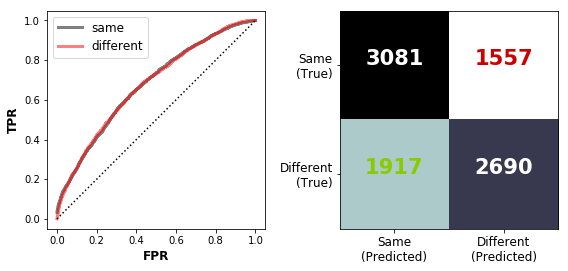

In [9]:
lr = LogisticRegression()
model_scores(lr, xtrain, ytrain, xtest, ytest)

### Random Forest

Training Data Accuracy: 1.00
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     10748
          1       1.00      1.00      1.00     10823

avg / total       1.00      1.00      1.00     21571

[[10823     0]
 [    0 10748]]
Test Data Accuracy:     0.68
             precision    recall  f1-score   support

          0       0.66      0.72      0.69      4607
          1       0.70      0.64      0.67      4638

avg / total       0.68      0.68      0.68      9245

[[2960 1678]
 [1294 3313]]


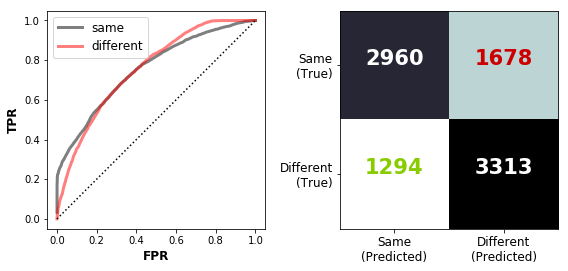

In [11]:
rf = RandomForestClassifier(n_estimators=500,class_weight='balanced')
model_scores(rf, xtrain, ytrain, xtest, ytest)

Training Data Accuracy: 0.99
             precision    recall  f1-score   support

          0       1.00      0.97      0.98     10748
          1       0.97      1.00      0.99     10823

avg / total       0.99      0.99      0.99     21571

[[10822     1]
 [  322 10426]]
Test Data Accuracy:     0.68
             precision    recall  f1-score   support

          0       0.67      0.69      0.68      4607
          1       0.68      0.66      0.67      4638

avg / total       0.68      0.68      0.68      9245

[[3058 1580]
 [1423 3184]]


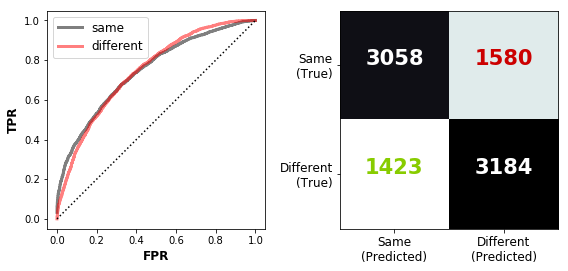

In [14]:
rf = RandomForestClassifier(n_estimators=2000, max_depth=15, class_weight='balanced')
model_scores(rf, xtrain, ytrain, xtest, ytest)

In [16]:
import pickle

# save the model to disk
filename = 'classifier_RF_2000_15.sav'
pickle.dump(rf, open(filename, 'wb'))
 
# # some time later...
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

In [17]:
# # some time later...
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(xtest, ytest)
# print(result)

0.6751757706868577


### Compute recognition results from training data

In [ ]:
def get_prediction_probs(unknown_vec, known_vecs, classifier, merge_method='L1'):
    
    m = len(vec1)
    N = len(know_vecs)
    vecs = [[abs(vec1[i]-vec2[k][i]) for i in range(m)] for k in range(N)]
    X = np.array(vecs)
    p = classifier.predict_proba(X)[:,1] #prob of being "same"
    
    return p

In [15]:
a = np.array()

TypeError: Required argument 'object' (pos 1) not found

In [ ]:
unknown_vec = 